# IMPORT LIBRARIES

In [1]:
import PyPDF2 as pdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
import wordcloud
from wordcloud import WordCloud
from matplotlib.pyplot import imread
import re

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

In [1]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=d112cc6db70902c981607cea4de3793eb6f3d931bb6887c48742329f4b73cf6e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


# IMPORT DATASET

In [2]:
#Read the input pdf data file

file_path = open(r"C:\Users\Achyut\Downloads\notes-from-the-underground.pdf", 'rb')
pdf_reader = pdf.PdfFileReader(file_path)

text=''
for i in range(0,pdf_reader.numPages):
    pageObj = pdf_reader.getPage(i)
    text=text+pageObj.extractText()
print(text)

Download free eBooks of classic literature, books and 
novels at Planet eBook. Subscribe to our free eBooks blog 
and email newsletter.
N˜˚˛˝ ˙ˆ˜ˇ ˚˘˛ 
U˛ˆˆ˜
B˜˜ˆ D˜˝˚˜˛˝
N˜˚˛˝ ˙ˆ˜ˇ ˚˘˛ Uˆˆ˜
P˜˚˛ I
Underground*
*˜e author of the diary and the diary itself are, of course, 
imaginary. Nevertheless it is clear that such persons as the 
writer of these notes not only may, but positively must, exist 
in our society, when we consider the circumstances in the 
midst of which our society is formed. I have tried to expose 
to the view of the public more distinctly than is commonly 
done, one of the characters of the recent past. He is one of the 
representatives of a generation still living. In this fragment, 
entitled ‚Underground,™ this person introduces himself and 
his views, and, as it were, tries to explain the causes owing to 
which he has made his appearance and was bound to make 
his appearance in our midst. In the second fragment there 
are added the actual notes of this person concer

# TEXT PRE-PROCESSING

In [3]:
text_data_extracted = re.sub(r'\\[[0-9]*\\]', ' ', text)
text_data_extracted = re.sub('[^a-zA-Z.,]', ' ', text_data_extracted)
text_data_extracted = re.sub(r"\b[a-zA-Z]\b",'', text_data_extracted)
text_data_extracted = re.sub("[A-Z]\Z",'', text_data_extracted)
text_data_extracted = re.sub(r'\s+', ' ', text_data_extracted)
text_data_extracted = re.sub('\n', '', text_data_extracted)
text_data_extracted

'Download free eBooks of classic literature, books and novels at Planet eBook. Subscribe to our free eBooks blog and email newsletter. Underground author of the diary and the diary itself are, of course, imaginary. Nevertheless it is clear that such persons as the writer of these notes not only may, but positively must, exist in our society, when we consider the circumstances in the midst of which our society is formed. have tried to expose to the view of the public more distinctly than is commonly done, one of the characters of the recent past. He is one of the representatives of generation still living. In this fragment, entitled Underground, this person introduces himself and his views, and, as it were, tries to explain the causes owing to which he has made his appearance and was bound to make his appearance in our midst. In the second fragment there are added the actual notes of this person concerning certain events in his life. AUTHOR NOTE. . II am sick man. ... am spiteful man. a

# SUMMARY EXTRACTION

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
stopWords = set (stopwords.words("english"))
words = word_tokenize(text_data_extracted)

In [6]:
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] +=1
    else:
        freqTable[word] =1

In [7]:
freqTable

{'download': 1,
 'free': 19,
 'ebooks': 2,
 'classic': 1,
 'literature': 2,
 ',': 3621,
 'books': 7,
 'novels': 1,
 'planet': 1,
 'ebook': 1,
 '.': 1982,
 'subscribe': 1,
 'blog': 1,
 'email': 1,
 'newsletter': 1,
 'underground': 19,
 'author': 3,
 'diary': 2,
 'course': 73,
 'imaginary': 1,
 'nevertheless': 1,
 'clear': 4,
 'persons': 10,
 'writer': 1,
 'notes': 5,
 'may': 64,
 'positively': 22,
 'must': 47,
 'exist': 4,
 'society': 6,
 'consider': 5,
 'circumstances': 8,
 'midst': 5,
 'formed': 1,
 'tried': 16,
 'expose': 2,
 'view': 5,
 'public': 8,
 'distinctly': 2,
 'commonly': 1,
 'done': 15,
 'one': 217,
 'characters': 1,
 'recent': 1,
 'past': 7,
 'representatives': 1,
 'generation': 2,
 'still': 46,
 'living': 10,
 'fragment': 2,
 'entitled': 1,
 'person': 11,
 'introduces': 1,
 'views': 2,
 'tries': 1,
 'explain': 5,
 'causes': 3,
 'owing': 6,
 'made': 55,
 'appearance': 7,
 'bound': 14,
 'make': 34,
 'second': 11,
 'added': 10,
 'actual': 2,
 'concerning': 3,
 'certain': 30,

In [8]:
sentences = sent_tokenize(text_data_extracted)
sentenceValue = dict()

In [9]:
for sentence in sentences:
    for word,freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq

In [10]:
sentenceValue

{'Download free eBooks of classic literature, books and novels at Planet eBook.': 5714,
 'Subscribe to our free eBooks blog and email newsletter.': 2150,
 'Underground author of the diary and the diary itself are, of course, imaginary.': 5820,
 'Nevertheless it is clear that such persons as the writer of these notes not only may, but positively must, exist in our society, when we consider the circumstances in the midst of which our society is formed.': 6242,
 'have tried to expose to the view of the public more distinctly than is commonly done, one of the characters of the recent past.': 6028,
 'He is one of the representatives of generation still living.': 2376,
 'In this fragment, entitled Underground, this person introduces himself and his views, and, as it were, tries to explain the causes owing to which he has made his appearance and was bound to make his appearance in our midst.': 6150,
 'In the second fragment there are added the actual notes of this person concerning certain ev

In [11]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
    
average = int(sumValues / len(sentenceValue))

print('Average   :',average)
print('sumValues :',sumValues)

Average   : 4848
sumValues : 9638811


In [12]:
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence]>(1.4*average)):
        summary += " "+sentence
print(summary)

 . wrote it thinking it would sound very witty but now that have seen myself that only wanted to show in despicable way, will not scratch it out on purpose When petitioners used to come for information to the table at which sat, used to grind my teeth at them, and felt intense enjoyment when succeeded in making any body unhappy. But do you know, gentlemen, what was the chief point about my spite Why, the whole point, the real sting of it lay in the fact that continually, even in the moment of the acutest spleen, was inwardly conscious with shame that was not only not spiteful but not even an embittered man, that was simply scaring sparrows at random and amusing myself by it. ... ... . For man everyday needs, it would have been quite enough to have the ordinary human consciousness, that is, half or quarter of the amount which falls to the lot of cultivated man of our unhappy nineteenth century, especially one who has the fatal ill luck to inhabit Petersburg, the most theo retical and in

In [13]:
len(text)

244666

In [14]:
len(summary)

36037

# SUMMARY PRE-PROCESSING

In [15]:
# Tokenization

from nltk.tokenize import word_tokenize
word_tokens=word_tokenize(summary)
print(word_tokens)

['.', 'wrote', 'it', 'thinking', 'it', 'would', 'sound', 'very', 'witty', 'but', 'now', 'that', 'have', 'seen', 'myself', 'that', 'only', 'wanted', 'to', 'show', 'in', 'despicable', 'way', ',', 'will', 'not', 'scratch', 'it', 'out', 'on', 'purpose', 'When', 'petitioners', 'used', 'to', 'come', 'for', 'information', 'to', 'the', 'table', 'at', 'which', 'sat', ',', 'used', 'to', 'grind', 'my', 'teeth', 'at', 'them', ',', 'and', 'felt', 'intense', 'enjoyment', 'when', 'succeeded', 'in', 'making', 'any', 'body', 'unhappy', '.', 'But', 'do', 'you', 'know', ',', 'gentlemen', ',', 'what', 'was', 'the', 'chief', 'point', 'about', 'my', 'spite', 'Why', ',', 'the', 'whole', 'point', ',', 'the', 'real', 'sting', 'of', 'it', 'lay', 'in', 'the', 'fact', 'that', 'continually', ',', 'even', 'in', 'the', 'moment', 'of', 'the', 'acutest', 'spleen', ',', 'was', 'inwardly', 'conscious', 'with', 'shame', 'that', 'was', 'not', 'only', 'not', 'spiteful', 'but', 'not', 'even', 'an', 'embittered', 'man', ',',

In [16]:
len(word_tokens)

7431

In [17]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in word_tokens if not word in my_stop_words]
print(no_stop_tokens[0:])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Achyut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Achyut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['.', 'wrote', 'thinking', 'would', 'sound', 'witty', 'seen', 'wanted', 'show', 'despicable', 'way', ',', 'scratch', 'purpose', 'When', 'petitioners', 'used', 'come', 'information', 'table', 'sat', ',', 'used', 'grind', 'teeth', ',', 'felt', 'intense', 'enjoyment', 'succeeded', 'making', 'body', 'unhappy', '.', 'But', 'know', ',', 'gentlemen', ',', 'chief', 'point', 'spite', 'Why', ',', 'whole', 'point', ',', 'real', 'sting', 'lay', 'fact', 'continually', ',', 'even', 'moment', 'acutest', 'spleen', ',', 'inwardly', 'conscious', 'shame', 'spiteful', 'even', 'embittered', 'man', ',', 'simply', 'scaring', 'sparrows', 'random', 'amusing', '.', '...', '...', '.', 'For', 'man', 'everyday', 'needs', ',', 'would', 'quite', 'enough', 'ordinary', 'human', 'consciousness', ',', ',', 'half', 'quarter', 'amount', 'falls', 'lot', 'cultivated', 'man', 'unhappy', 'nineteenth', 'century', ',', 'especially', 'one', 'fatal', 'ill', 'luck', 'inhabit', 'Petersburg', ',', 'theo', 'retical', 'intentional', '

In [18]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:])

['.', 'wrote', 'thinking', 'would', 'sound', 'witty', 'seen', 'wanted', 'show', 'despicable', 'way', ',', 'scratch', 'purpose', 'when', 'petitioners', 'used', 'come', 'information', 'table', 'sat', ',', 'used', 'grind', 'teeth', ',', 'felt', 'intense', 'enjoyment', 'succeeded', 'making', 'body', 'unhappy', '.', 'but', 'know', ',', 'gentlemen', ',', 'chief', 'point', 'spite', 'why', ',', 'whole', 'point', ',', 'real', 'sting', 'lay', 'fact', 'continually', ',', 'even', 'moment', 'acutest', 'spleen', ',', 'inwardly', 'conscious', 'shame', 'spiteful', 'even', 'embittered', 'man', ',', 'simply', 'scaring', 'sparrows', 'random', 'amusing', '.', '...', '...', '.', 'for', 'man', 'everyday', 'needs', ',', 'would', 'quite', 'enough', 'ordinary', 'human', 'consciousness', ',', ',', 'half', 'quarter', 'amount', 'falls', 'lot', 'cultivated', 'man', 'unhappy', 'nineteenth', 'century', ',', 'especially', 'one', 'fatal', 'ill', 'luck', 'inhabit', 'petersburg', ',', 'theo', 'retical', 'intentional', '

### Lemmatization of words

In [19]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [20]:
doc = nlp(' '.join(lower_words))
print(doc[0:])

. wrote thinking would sound witty seen wanted show despicable way , scratch purpose when petitioners used come information table sat , used grind teeth , felt intense enjoyment succeeded making body unhappy . but know , gentlemen , chief point spite why , whole point , real sting lay fact continually , even moment acutest spleen , inwardly conscious shame spiteful even embittered man , simply scaring sparrows random amusing . ... ... . for man everyday needs , would quite enough ordinary human consciousness , , half quarter amount falls lot cultivated man unhappy nineteenth century , especially one fatal ill luck inhabit petersburg , theo retical intentional town whole terrestrial globe . tell happen , yes , moments capable feeling every renement sublime beautiful , used say one time , would , though design , happen feel ugly things , ... well , short , actions , perhaps , commit , though pur posely , occurred time conscious ought committed . ashamed even , perhaps , ashamed got point

In [21]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:])

['.', 'write', 'thinking', 'would', 'sound', 'witty', 'see', 'want', 'show', 'despicable', 'way', ',', 'scratch', 'purpose', 'when', 'petitioner', 'use', 'come', 'information', 'table', 'sit', ',', 'use', 'grind', 'tooth', ',', 'feel', 'intense', 'enjoyment', 'succeed', 'make', 'body', 'unhappy', '.', 'but', 'know', ',', 'gentleman', ',', 'chief', 'point', 'spite', 'why', ',', 'whole', 'point', ',', 'real', 'sting', 'lie', 'fact', 'continually', ',', 'even', 'moment', 'acutest', 'spleen', ',', 'inwardly', 'conscious', 'shame', 'spiteful', 'even', 'embitter', 'man', ',', 'simply', 'scare', 'sparrow', 'random', 'amusing', '.', '...', '...', '.', 'for', 'man', 'everyday', 'need', ',', 'would', 'quite', 'enough', 'ordinary', 'human', 'consciousness', ',', ',', 'half', 'quarter', 'amount', 'fall', 'lot', 'cultivate', 'man', 'unhappy', 'nineteenth', 'century', ',', 'especially', 'one', 'fatal', 'ill', 'luck', 'inhabit', 'petersburg', ',', 'theo', 'retical', 'intentional', 'town', 'whole', 't

In [22]:
cleaned_book_data = ' '.join(lemmas)
cleaned_book_data

'. write thinking would sound witty see want show despicable way , scratch purpose when petitioner use come information table sit , use grind tooth , feel intense enjoyment succeed make body unhappy . but know , gentleman , chief point spite why , whole point , real sting lie fact continually , even moment acutest spleen , inwardly conscious shame spiteful even embitter man , simply scare sparrow random amusing . ... ... . for man everyday need , would quite enough ordinary human consciousness , , half quarter amount fall lot cultivate man unhappy nineteenth century , especially one fatal ill luck inhabit petersburg , theo retical intentional town whole terrestrial globe . tell happen , yes , moment capable feel every renement sublime beautiful , use say one time , would , though design , happen feel ugly thing , ... well , short , action , perhaps , commit , though pur posely , occur time conscious ought commit . ashamed even , perhaps , ashamed get point feel sort secret abnormal , d

# FEATURE EXTRACTION

### I. Using Count Vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [24]:
print(vectorizer.vocabulary_)

{'write': 1346, 'thinking': 1208, 'would': 1341, 'sound': 1116, 'witty': 1332, 'see': 1040, 'want': 1304, 'show': 1070, 'despicable': 286, 'way': 1306, 'scratch': 1033, 'purpose': 932, 'when': 1312, 'petitioner': 871, 'use': 1279, 'come': 203, 'information': 593, 'table': 1182, 'sit': 1091, 'grind': 498, 'tooth': 1233, 'feel': 428, 'intense': 605, 'enjoyment': 367, 'succeed': 1163, 'make': 715, 'body': 134, 'unhappy': 1269, 'but': 148, 'know': 637, 'gentleman': 475, 'chief': 181, 'point': 884, 'spite': 1124, 'why': 1318, 'whole': 1317, 'real': 955, 'sting': 1141, 'lie': 668, 'fact': 415, 'continually': 232, 'even': 386, 'moment': 749, 'acutest': 21, 'spleen': 1126, 'inwardly': 614, 'conscious': 219, 'shame': 1061, 'spiteful': 1125, 'embitter': 357, 'man': 718, 'simply': 1085, 'scare': 1027, 'sparrow': 1118, 'random': 943, 'amusing': 50, 'for': 439, 'everyday': 391, 'need': 781, 'quite': 939, 'enough': 369, 'ordinary': 828, 'human': 546, 'consciousness': 221, 'half': 506, 'quarter': 937

In [25]:
print(vectorizer.get_feature_names()[0:])
print(X.toarray()[0:])

['ab', 'able', 'abnormal', 'about', 'abrupt', 'absolute', 'absur', 'absurd', 'absurditie', 'ac', 'accept', 'accord', 'accordance', 'account', 'ache', 'achieve', 'act', 'action', 'actually', 'acute', 'acutely', 'acutest', 'ad', 'add', 'address', 'admiration', 'advantage', 'advantageous', 'adventures', 'aer', 'aerward', 'afraid', 'age', 'ago', 'agreeable', 'aim', 'air', 'akimbo', 'ality', 'all', 'ally', 'almost', 'alone', 'already', 'also', 'altogether', 'always', 'among', 'amount', 'amuse', 'amusing', 'and', 'anger', 'animal', 'announce', 'annoying', 'another', 'answer', 'anti', 'anton', 'antonitch', 'anyone', 'anything', 'apart', 'apollon', 'apparent', 'apply', 'approach', 'ar', 'arbitrator', 'argument', 'arise', 'arithmetic', 'arm', 'around', 'ashamed', 'aside', 'ask', 'askance', 'assailant', 'asset', 'at', 'attain', 'attention', 'attract', 'attractive', 'audacious', 'audience', 'average', 'await', 'aware', 'away', 'awful', 'awkward', 'babe', 'baby', 'back', 'background', 'bad', 'bar'

In [26]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(X.toarray().shape)

(3933, 1359)


### II. Using Count Vectorizer with N-grams (Bigrams and Trigrams)

In [28]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 1000)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [29]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['ab', 'able', 'abnormal', 'about', 'abrupt', 'absolute', 'absur', 'absurd', 'absurditie', 'ac', 'accept', 'accord', 'accordance', 'account', 'ache', 'achieve', 'act', 'action', 'actually', 'acute', 'acutely', 'acutest', 'ad', 'add', 'address', 'admiration', 'advantage', 'advantageous', 'adventures', 'aer', 'aerward', 'afraid', 'age', 'ago', 'agreeable', 'aim', 'air', 'akimbo', 'ality', 'all', 'ally', 'almost', 'alone', 'already', 'also', 'altogether', 'always', 'among', 'amount', 'amuse', 'amusing', 'and', 'anger', 'animal', 'announce', 'annoying', 'another', 'answer', 'anti', 'anton', 'antonitch', 'anyone', 'anything', 'apart', 'apollon', 'apparent', 'apply', 'approach', 'ar', 'arbitrator', 'argument', 'arise', 'arithmetic', 'arm', 'around', 'ashamed', 'aside', 'ask', 'askance', 'assailant', 'asset', 'at', 'attain', 'attention', 'attract', 'attractive', 'audacious', 'audience', 'average', 'await', 'aware', 'away', 'awful', 'awkward', 'babe', 'baby', 'back', 'background', 'bad', 'bar'

### III. Tf-Idf Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['ab', 'able', 'absolute', 'absurd', 'ac', 'ache', 'act', 'action', 'ad', 'add', 'advantage', 'advantageous', 'aer', 'aerward', 'age', 'ago', 'almost', 'alone', 'also', 'always', 'and', 'another', 'answer', 'anyone', 'anything', 'apply', 'arise', 'arithmetic', 'around', 'ashamed', 'aside', 'ask', 'attain', 'away', 'baby', 'back', 'bad', 'barbarous', 'be', 'bear', 'beat', 'beautiful', 'become', 'begin', 'benet', 'besides', 'bind', 'bit', 'blame', 'bless', 'body', 'break', 'bring', 'busy', 'but', 'cal', 'calculate', 'call', 'care', 'case', 'cease', 'cellar', 'certain', 'certainly', 'certainty', 'change', 'chaos', 'charming', 'chief', 'child', 'civilian', 'clear', 'clearly', 'colour', 'come', 'commit', 'comparatively', 'con', 'conclusion', 'conscious', 'consciously', 'consciousness', 'continually', 'contrive', 'convince', 'corner', 'could', 'course', 'crush', 'curse', 'dance', 'dare', 'darkness', 'day', 'de', 'dead', 'death', 'declare', 'degradation', 'degree', 'depend', 'depth', 'desire'

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l1",analyzer='word', ngram_range=(1,3), max_features = 1000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['ab', 'able', 'abnormal', 'about', 'abrupt', 'absolute', 'absur', 'absurd', 'absurditie', 'ac', 'accept', 'accord', 'accordance', 'account', 'ache', 'achieve', 'act', 'action', 'actually', 'acute', 'acutely', 'acutest', 'ad', 'add', 'address', 'admiration', 'advantage', 'advantageous', 'adventures', 'aer', 'aerward', 'afraid', 'age', 'ago', 'agreeable', 'aim', 'air', 'akimbo', 'ality', 'all', 'ally', 'almost', 'alone', 'already', 'also', 'altogether', 'always', 'among', 'amount', 'amuse', 'amusing', 'and', 'anger', 'animal', 'announce', 'annoying', 'another', 'answer', 'anti', 'anton', 'antonitch', 'anyone', 'anything', 'apart', 'apollon', 'apparent', 'apply', 'approach', 'ar', 'arbitrator', 'argument', 'arise', 'arithmetic', 'arm', 'around', 'ashamed', 'aside', 'ask', 'askance', 'assailant', 'asset', 'at', 'attain', 'attention', 'attract', 'attractive', 'audacious', 'audience', 'average', 'await', 'aware', 'away', 'awful', 'awkward', 'babe', 'baby', 'back', 'background', 'bad', 'bar'

# WORD CLOUD GENERATION

In [32]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(50, 40))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

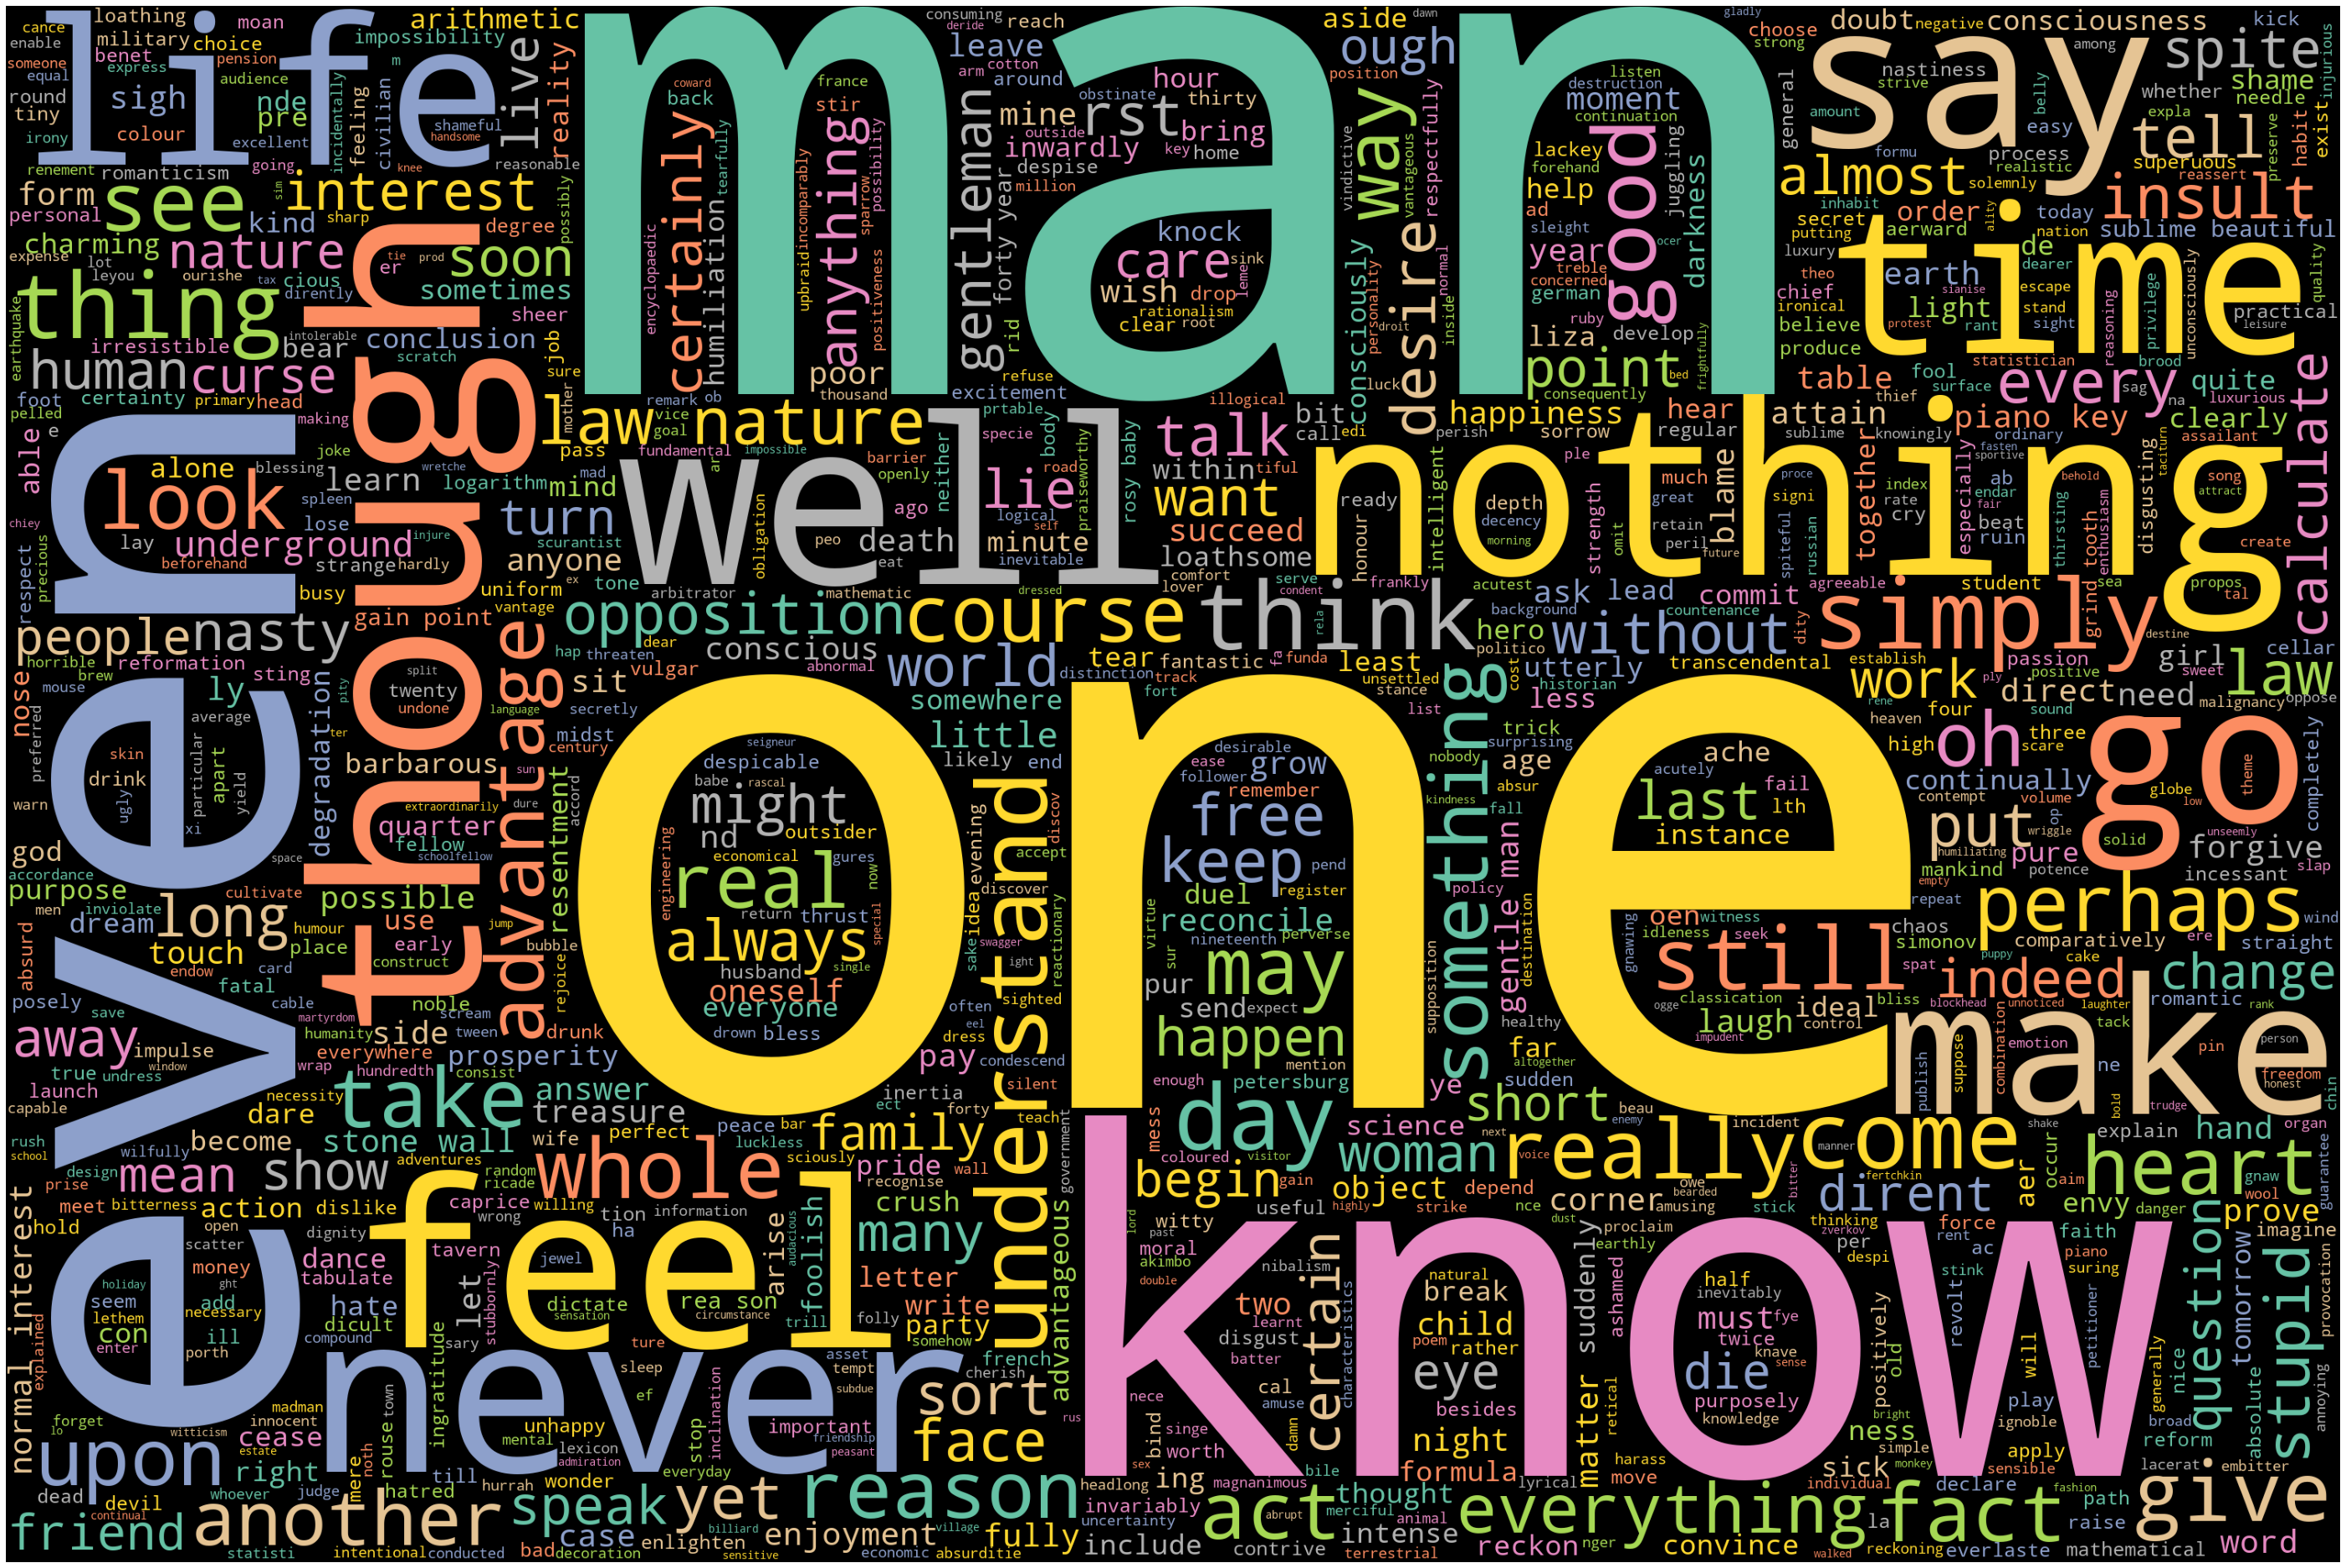

In [33]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('soul')
stopwords.add('announce')
stopwords.add('love')
stopwords.add('coincide')
stopwords.add('career')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=1000,colormap='Set2',stopwords=stopwords).generate(cleaned_book_data)
# Plot
plot_cloud(wordcloud)

# NAMED ENTITY RECOGNITION

In [34]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [35]:
one_block = cleaned_book_data
doc_block = nlp(cleaned_book_data)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [36]:
one_block

'. write thinking would sound witty see want show despicable way , scratch purpose when petitioner use come information table sit , use grind tooth , feel intense enjoyment succeed make body unhappy . but know , gentleman , chief point spite why , whole point , real sting lie fact continually , even moment acutest spleen , inwardly conscious shame spiteful even embitter man , simply scare sparrow random amusing . ... ... . for man everyday need , would quite enough ordinary human consciousness , , half quarter amount fall lot cultivate man unhappy nineteenth century , especially one fatal ill luck inhabit petersburg , theo retical intentional town whole terrestrial globe . tell happen , yes , moment capable feel every renement sublime beautiful , use say one time , would , though design , happen feel ugly thing , ... well , short , action , perhaps , commit , though pur posely , occur time conscious ought commit . ashamed even , perhaps , ashamed get point feel sort secret abnormal , d

In [37]:
for token in doc_block[0:]:
    print(token, token.pos_)

. PUNCT
write VERB
thinking NOUN
would AUX
sound VERB
witty ADJ
see NOUN
want VERB
show NOUN
despicable ADJ
way NOUN
, PUNCT
scratch NOUN
purpose NOUN
when SCONJ
petitioner NOUN
use NOUN
come VERB
information NOUN
table NOUN
sit VERB
, PUNCT
use VERB
grind NOUN
tooth NOUN
, PUNCT
feel VERB
intense ADJ
enjoyment NOUN
succeed NOUN
make VERB
body NOUN
unhappy ADJ
. PUNCT
but CCONJ
know VERB
, PUNCT
gentleman NOUN
, PUNCT
chief ADJ
point NOUN
spite NOUN
why SCONJ
, PUNCT
whole ADJ
point NOUN
, PUNCT
real ADJ
sting VERB
lie NOUN
fact NOUN
continually ADV
, PUNCT
even ADV
moment NOUN
acutest ADV
spleen NOUN
, PUNCT
inwardly ADV
conscious ADJ
shame NOUN
spiteful ADJ
even ADV
embitter VERB
man NOUN
, PUNCT
simply ADV
scare VERB
sparrow VERB
random ADJ
amusing NOUN
. PUNCT
... PUNCT
... PUNCT
. PUNCT
for ADP
man NOUN
everyday ADJ
need NOUN
, PUNCT
would AUX
quite ADV
enough ADV
ordinary ADJ
human ADJ
consciousness NOUN
, PUNCT
, PUNCT
half ADJ
quarter NOUN
amount NOUN
fall NOUN
lot NOUN
cultiva

aim VERB
one NUM
case NOUN
another PRON
, PUNCT
real ADJ
mathematical ADJ
formu NOUN
la X
, PUNCT
likely ADV
, PUNCT
man NOUN
cease NOUN
feel VERB
desire NOUN
, PUNCT
indeed ADV
, PUNCT
certain ADJ
. PUNCT
and CCONJ
choice NOUN
reasoning NOUN
really ADV
calculate VERB
day NOUN
discov NOUN
ere PROPN
law NOUN
call NOUN
free ADJ
, PUNCT
joke NOUN
apart ADV
, PUNCT
may AUX
one NUM
day NOUN
something PRON
like ADP
table NOUN
construct NOUN
, PUNCT
really ADV
shall AUX
choose VERB
accordance NOUN
. PUNCT
if SCONJ
, PUNCT
instance NOUN
, PUNCT
day NOUN
calculate NOUN
prove VERB
make VERB
long ADJ
nose NOUN
someone PRON
could AUX
help VERB
make VERB
long ADJ
nose NOUN
particular ADJ
way NOUN
, PUNCT
freedom NOUN
leme NOUN
, PUNCT
especially ADV
learn VERB
man NOUN
take VERB
degree NOUN
somewhere ADV
able ADJ
calculate NOUN
whole ADJ
life NOUN
thirty NUM
year NOUN
beforehand ADV
. PUNCT
what PRON
reason NOUN
know VERB
reason NOUN
know NOUN
succeed VERB
learn VERB
thing NOUN
, PUNCT
perhaps ADV


trudge NOUN
simonov NOUN
early ADV
next ADJ
morning NOUN
rouse NOUN
jump NOUN
bed NOUN
excitement NOUN
, PUNCT
though ADV
happen VERB
. PUNCT
, PUNCT
perhaps ADV
, PUNCT
would AUX
reconcile VERB
drink NOUN
everlaste NOUN
friendship NOUN
bitter ADJ
humiliating NOUN
know VERB
even ADV
, PUNCT
know VERB
fully ADV
certain ADJ
, PUNCT
need VERB
nothing PRON
really ADV
, PUNCT
really ADV
want VERB
crush NOUN
, PUNCT
subdue NOUN
, PUNCT
attract VERB
, PUNCT
care NOUN
straw NOUN
ally NOUN
result VERB
, PUNCT
even ADV
achieve VERB
. PUNCT
. PUNCT
so ADV
, PUNCT
, PUNCT
feel VERB
ineably ADV
superior ADJ
every DET
respect NOUN
if SCONJ
mean ADJ
insult VERB
high ADJ
ocial ADJ
tone NOUN
, PUNCT
would AUX
matter VERB
, PUNCT
think VERB
could AUX
pay VERB
back ADV
one NUM
way NOUN
another PRON
. PUNCT
. PUNCT
at ADP
time NOUN
, PUNCT
intense ADJ
, PUNCT
acute ADJ
pang NOUN
stab PROPN
heart NOUN
think VERB
ten NUM
year NOUN
, PUNCT
twenty NUM
year NOUN
, PUNCT
forty NUM
year NOUN
would AUX
pass VERB


lackey NOUN
, PUNCT
lackey NOUN
jeering NOUN
and CCONJ
shall AUX
never ADV
forgive VERB
tear NOUN
could AUX
help VERB
shed VERB
, PUNCT
like SCONJ
silly ADJ
woman NOUN
put VERB
shame NOUN
and CCONJ
confessing NOUN
, PUNCT
shall AUX
never ADV
forgive VERB
either CCONJ
yes INTJ
must AUX
answer VERB
turn NOUN
like INTJ
, PUNCT
blackguard ADJ
, PUNCT
nasty ADJ
, PUNCT
stupid ADJ
, PUNCT
absurd ADJ
envious ADJ
worm NOUN
earth NOUN
, PUNCT
bit NOUN
well ADV
, PUNCT
, PUNCT
devil NOUN
know VERB
, PUNCT
never ADV
put VERB
confusion NOUN
shall AUX
always ADV
insult VERB
every DET
louse NOUN
, PUNCT
doom PROPN
and CCONJ
understand VERB
word NOUN
and CCONJ
care NOUN
, PUNCT
care VERB
, PUNCT
whether SCONJ
go VERB
ruin PROPN
do AUX
understand VERB
how SCONJ
shall AUX
hate VERB
aer PROPN
say VERB
, PUNCT
lis NOUN
tening NOUN
. PUNCT
besides ADV
, PUNCT
crush NOUN
, PUNCT
poor ADJ
girl NOUN
consider VERB
innitely ADV
beneath ADP
could AUX
feel VERB
anger NOUN
resentment NOUN
she PRON
suddenly ADV
le

In [38]:
nouns_verbs_adjectives = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB','ADJ')]
print(nouns_verbs_adjectives[0:])

['write', 'thinking', 'sound', 'witty', 'see', 'want', 'show', 'despicable', 'way', 'scratch', 'purpose', 'petitioner', 'use', 'come', 'information', 'table', 'sit', 'use', 'grind', 'tooth', 'feel', 'intense', 'enjoyment', 'succeed', 'make', 'body', 'unhappy', 'know', 'gentleman', 'chief', 'point', 'spite', 'whole', 'point', 'real', 'sting', 'lie', 'fact', 'moment', 'spleen', 'conscious', 'shame', 'spiteful', 'embitter', 'man', 'scare', 'sparrow', 'random', 'amusing', 'man', 'everyday', 'need', 'ordinary', 'human', 'consciousness', 'half', 'quarter', 'amount', 'fall', 'lot', 'cultivate', 'unhappy', 'nineteenth', 'century', 'fatal', 'ill', 'luck', 'inhabit', 'petersburg', 'retical', 'intentional', 'town', 'whole', 'terrestrial', 'globe', 'tell', 'happen', 'moment', 'capable', 'feel', 'renement', 'sublime', 'beautiful', 'use', 'say', 'time', 'design', 'happen', 'feel', 'ugly', 'thing', 'short', 'action', 'commit', 'occur', 'time', 'conscious', 'commit', 'ashamed', 'ashamed', 'get', 'poin

In [39]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs_adjectives)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:50]

word  count
0          man     41
1         know     36
2         feel     21
3          say     17
4         life     17
5         time     16
6          law     16
7           go     16
8         love     16
9         make     15
10  understand     15
11      nature     14
12       think     14
13       thing     13
14         day     13
15        come     12
16         see     11
17       whole     11
18        good     11
19        take     11
20        give     11
21        fact     10
22      reason     10
23      course     10
24        look     10
25    interest     10
26   advantage     10
27       heart     10
28         way      9
29       point      8
30        real      8
31        keep      8
32      insult      8
33      desire      8
34      stupid      8
35        tell      7
36         put      7
37         act      7
38        year      7
39  opposition      7
40        talk      7
41        free      7
42        face      7
43        show      6
44   gentleman      6
45       spite      6
46         lie      6
47       human      6
48      happen      6
49        last      6

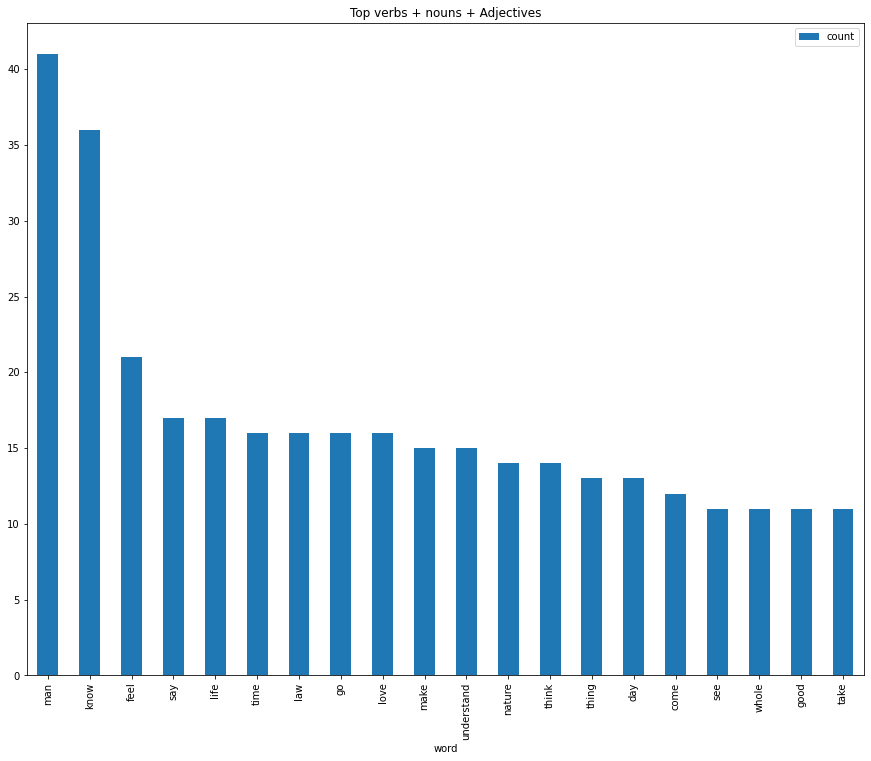

In [40]:
##Visualizing results
#Barchart for top 50 nouns + verbs + Adjectives
wf_df[0:20].plot.bar(x='word', figsize=(15,12), title='Top verbs + nouns + Adjectives')
plt.show()

# EMOTION MINING

### Summary Cleaning

In [153]:
summary_data = summary.strip('\n')
summary_data

' . wrote it thinking it would sound very witty but now that have seen myself that only wanted to show in despicable way, will not scratch it out on purpose When petitioners used to come for information to the table at which sat, used to grind my teeth at them, and felt intense enjoyment when succeeded in making any body unhappy. But do you know, gentlemen, what was the chief point about my spite Why, the whole point, the real sting of it lay in the fact that continually, even in the moment of the acutest spleen, was inwardly conscious with shame that was not only not spiteful but not even an embittered man, that was simply scaring sparrows at random and amusing myself by it. ... ... . For man everyday needs, it would have been quite enough to have the ordinary human consciousness, that is, half or quarter of the amount which falls to the lot of cultivated man of our unhappy nineteenth century, especially one who has the fatal ill luck to inhabit Petersburg, the most theo retical and i

In [154]:
summary_data_extracted = re.sub(r'\\[[0-9]*\\]', ' ', summary_data)
summary_data_extracted = re.sub('[^a-zA-Z.,]', ' ', summary_data_extracted)
summary_data_extracted = re.sub(r"\b[a-zA-Z]\b",'', summary_data_extracted)
summary_data_extracted = re.sub("[A-Z]\Z",'', summary_data_extracted)
summary_data_extracted = re.sub(r'\s+', ' ', summary_data_extracted)
summary_data_extracted = re.sub('\n', '', summary_data_extracted)
summary_data_extracted

' . wrote it thinking it would sound very witty but now that have seen myself that only wanted to show in despicable way, will not scratch it out on purpose When petitioners used to come for information to the table at which sat, used to grind my teeth at them, and felt intense enjoyment when succeeded in making any body unhappy. But do you know, gentlemen, what was the chief point about my spite Why, the whole point, the real sting of it lay in the fact that continually, even in the moment of the acutest spleen, was inwardly conscious with shame that was not only not spiteful but not even an embittered man, that was simply scaring sparrows at random and amusing myself by it. ... ... . For man everyday needs, it would have been quite enough to have the ordinary human consciousness, that is, half or quarter of the amount which falls to the lot of cultivated man of our unhappy nineteenth century, especially one who has the fatal ill luck to inhabit Petersburg, the most theo retical and i

In [155]:
sentences_summary = sent_tokenize(summary_data_extracted)
sentences_summary

[' .',
 'wrote it thinking it would sound very witty but now that have seen myself that only wanted to show in despicable way, will not scratch it out on purpose When petitioners used to come for information to the table at which sat, used to grind my teeth at them, and felt intense enjoyment when succeeded in making any body unhappy.',
 'But do you know, gentlemen, what was the chief point about my spite Why, the whole point, the real sting of it lay in the fact that continually, even in the moment of the acutest spleen, was inwardly conscious with shame that was not only not spiteful but not even an embittered man, that was simply scaring sparrows at random and amusing myself by it.',
 '... ... .',
 'For man everyday needs, it would have been quite enough to have the ordinary human consciousness, that is, half or quarter of the amount which falls to the lot of cultivated man of our unhappy nineteenth century, especially one who has the fatal ill luck to inhabit Petersburg, the most t

In [156]:
sentences_df = pd.DataFrame(sentences_summary, columns=['sentence'])
sentences_df

sentence
0                                                    .
1    wrote it thinking it would sound very witty bu...
2    But do you know, gentlemen, what was the chief...
3                                            ... ... .
4    For man everyday needs, it would have been qui...
..                                                 ...
101                                                  .
102                                                  .
103                                                  .
104                                                  .
105  Why, to tell long sto ries, showing how have s...

[106 rows x 1 columns]

### II. Calculating sentiment scores 

In [157]:
afinn = pd.read_csv('Afinn.csv', sep=',',encoding='Latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [158]:
afinn.shape

(2477, 2)

In [159]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [160]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [161]:
# test that it works
calculate_sentiment(text = 'good')

3

In [162]:
calculate_sentiment(text = 'riot')

-2

In [163]:
sentences_df['sentiment_value'] = sentences_df['sentence'].apply(calculate_sentiment)
sentences_df

sentence  sentiment_value
0                                                    .                0
1    wrote it thinking it would sound very witty bu...                0
2    But do you know, gentlemen, what was the chief...               -5
3                                            ... ... .                0
4    For man everyday needs, it would have been qui...               -1
..                                                 ...              ...
101                                                  .                0
102                                                  .                0
103                                                  .                0
104                                                  .                0
105  Why, to tell long sto ries, showing how have s...                6

[106 rows x 2 columns]

### III. Calculating number of words

In [164]:
# how many words are in the sentence?
sentences_df['word_count'] = sentences_df['sentence'].str.split().apply(len)
sentences_df['word_count'].head(50)

0       1
1      60
2      65
3       3
4      60
5      93
6      75
7     116
8      56
9      85
10     72
11     91
12     98
13     96
14     27
15     53
16     76
17      1
18    214
19     77
20     94
21    129
22    110
23     56
24     84
25     67
26    111
27     48
28      1
29     70
30     50
31     63
32     54
33     59
34     40
35     56
36     85
37     64
38     48
39    125
40    133
41    104
42     76
43     69
44      1
45     90
46     63
47      1
48     70
49    133
Name: word_count, dtype: int64

### IV. Dataframe Analysis 

In [165]:
sentences_df.sort_values(by='sentiment_value').head(25)

sentence  sentiment_value  \
39   And if he does not nd means he will contrive d...              -15   
12   in the least, and therefore grinding your teet...              -12   
79   will thrust you dying into the lthiest corner ...              -12   
67   At times, with an intense, acute pang was stab...              -10   
6    was ashamed even now, perhaps, am ashamed got ...               -8   
54   is was regular martyrdom, continual, intolerab...               -8   
100  Will it not be better that she should keep the...               -8   
95   Besides, she was so crushed, poor girl she con...               -7   
48   We Russians, speaking generally, have never ha...               -6   
9    Apart from the one funda mental nastiness the ...               -6   
2    But do you know, gentlemen, what was the chief...               -5   
98   She realised that my outburst of passion had b...               -5   
11   Oh, absur dity of absurdities How much better ...               -5   
96   But the trouble was that the hysterics could n...               -4   
58   hated the abrupt self condent tone of his voic...               -4   
53   was fully convinced the sense of reality, in s...               -4   
80   While for you neither tear, nor sigh, nor reme...               -4   
60   Of Simonov two visitors, one was Fertchkin, Ru...               -3   
90   If were still not brought to reason by all thi...               -3   
33   But repeat for the hundredth time, there is on...               -3   
14   ... For that one could not blame even the laws...               -2   
34   But very oen, and even most oen, choice is utt...               -2   
74   VII , hush, Liza How can you talk about being ...               -2   
94   saviour, the former hero, was ying like mangy,...               -2   
32   What does reason know Reason only knows what i...               -2   

     word_count  
39          125  
12           98  
79           84  
67           47  
6            75  
54           58  
100         129  
95           58  
48           70  
9            85  
2            65  
98           60  
11           91  
96           67  
58           57  
53           67  
80          111  
60           58  
90           63  
33           59  
14           27  
34           40  
74           67  
94          166  
32           54

In [166]:
# Sentiment score of the whole review
sentences_df['sentiment_value'].describe()

count    106.000000
mean       1.047170
std        5.936781
min      -15.000000
25%       -1.000000
50%        0.000000
75%        3.000000
max       22.000000
Name: sentiment_value, dtype: float64

In [167]:
# Sentiment score of the whole review
sentences_df[sentences_df['sentiment_value']<=0].head(20)

sentence  sentiment_value  \
0                                                   .                0   
1   wrote it thinking it would sound very witty bu...                0   
2   But do you know, gentlemen, what was the chief...               -5   
3                                           ... ... .                0   
4   For man everyday needs, it would have been qui...               -1   
6   was ashamed even now, perhaps, am ashamed got ...               -8   
7   have spoken of this because keep wanting to kn...               -1   
8   should certainly have never been able to do an...               -1   
9   Apart from the one funda mental nastiness the ...               -6   
11  Oh, absur dity of absurdities How much better ...               -5   
12  in the least, and therefore grinding your teet...              -12   
14  ... For that one could not blame even the laws...               -2   
15  How many times it has happened to me well, for...                0   
17                                                  .                0   
24  at is not all then, you say, science itself wi...               -1   
26  ... , for instance, would not be in the least ...               -1   
28                                                  .                0   
32  What does reason know Reason only knows what i...               -2   
33  But repeat for the hundredth time, there is on...               -3   
34  But very oen, and even most oen, choice is utt...               -2   

    word_count  
0            1  
1           60  
2           65  
3            3  
4           60  
6           75  
7          116  
8           56  
9           85  
11          91  
12          98  
14          27  
15          53  
17           1  
24          84  
26         111  
28           1  
32          54  
33          59  
34          40

In [168]:
sentences_df[sentences_df['sentiment_value']>=10].head(10)

sentence  sentiment_value  \
16  should live at ease, should die with dignity, ...               17   
19  ... What do you think are there such cases You...               12   
22  fact is, gentle men, it seems there must reall...               22   
57  And what loving kindness, oh Lord, what loving...               22   
71  And what if all goes well with the family, if ...               12   
86  was so delighted at this that, as signed the I...               10   
89  would take the seven roubles out of drawer, sh...               16   

    word_count  
16          76  
19          77  
22         110  
57          70  
71          52  
86          99  
89          85

In [169]:
sentences_df['index']=range(0,len(sentences_df))

### V. Data Visualisation

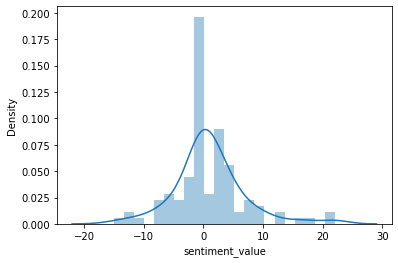

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sentences_df['sentiment_value'])
plt.show()

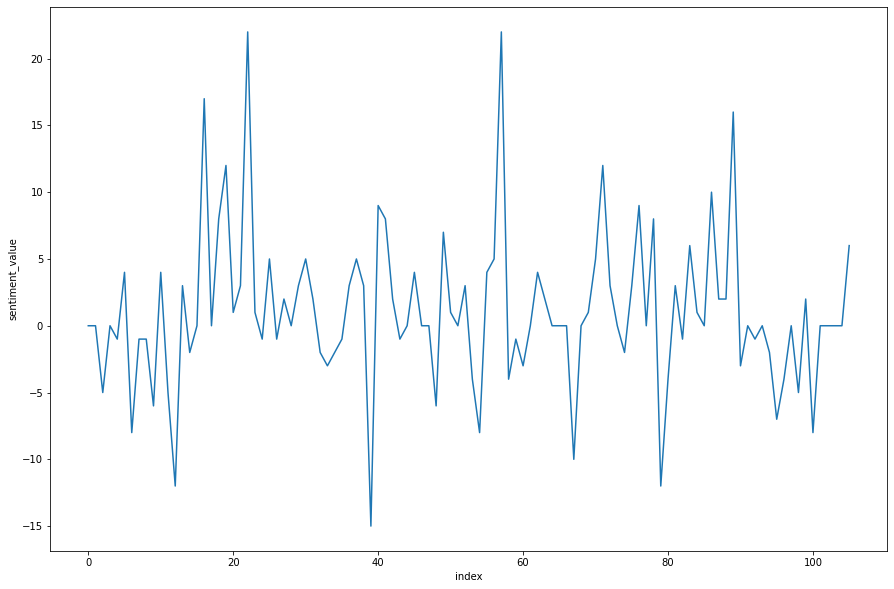

In [171]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sentences_df)
plt.show()

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

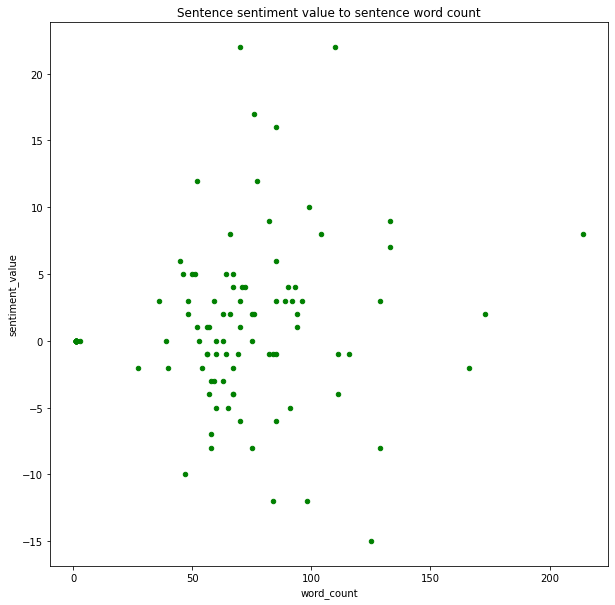

In [172]:
sentences_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(10,10), title='Sentence sentiment value to sentence word count',c='g')

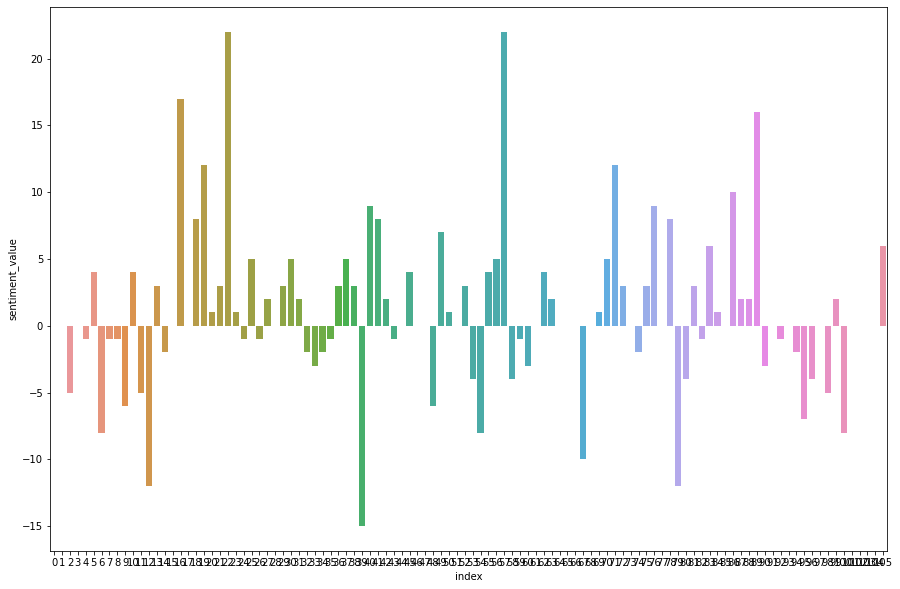

In [173]:
plt.figure(figsize=(15, 10))
sns.barplot(y='sentiment_value',x='index',data=sentences_df)
plt.show()

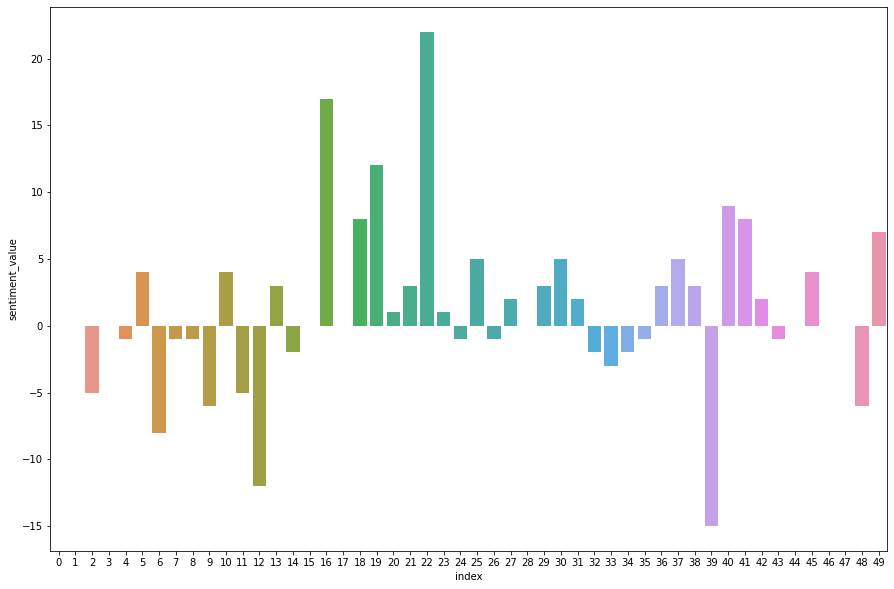

In [174]:
plt.figure(figsize=(15, 10))
sns.barplot(y='sentiment_value',x='index',data=sentences_df[0:50])
plt.show()

In [175]:
sentences_df.dtypes

sentence           object
sentiment_value     int64
word_count          int64
index               int64
dtype: object

In [176]:
#Converting the sentiments to Positive,Negative and Neutral based on the sentiment values

sentences_df.loc[sentences_df['sentiment_value'] > 0, 'sentiment'] = 'Positive'
sentences_df.loc[sentences_df['sentiment_value'] < 0, 'sentiment'] = 'Negative'
sentences_df.loc[sentences_df['sentiment_value'] == 0, 'sentiment'] = 'Neutral'

In [177]:
#Seperating the Positive,Negative and Neutral sentiments

# Use dropna() so the base DataFrame is not affected
Positive = sentences_df[sentences_df["sentiment"] == "Positive"].dropna()
Neutral = sentences_df[sentences_df["sentiment"] == "Neutral"].dropna()
Negative = sentences_df[sentences_df["sentiment"] == "Negative"].dropna()

In [178]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

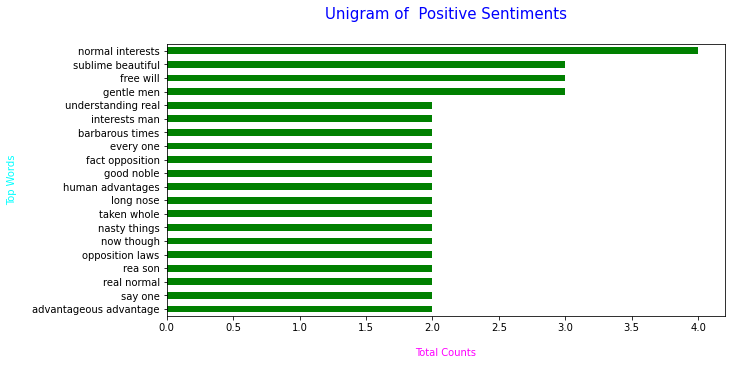

In [179]:
# Finding Unigram
words = Gram_Analysis(Positive["sentence"], 2, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of  Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

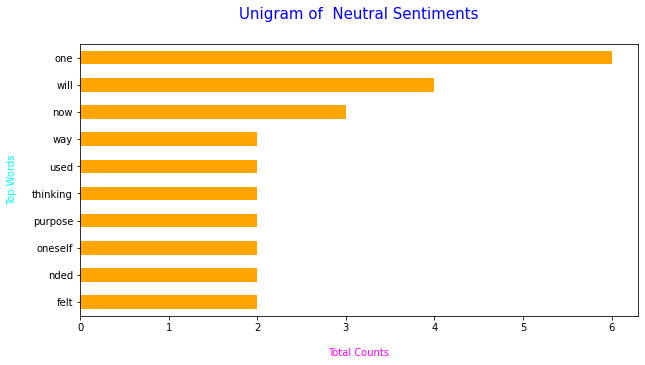

In [180]:
# Finding Unigram
words = Gram_Analysis(Neutral["sentence"], 1, 10)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of  Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

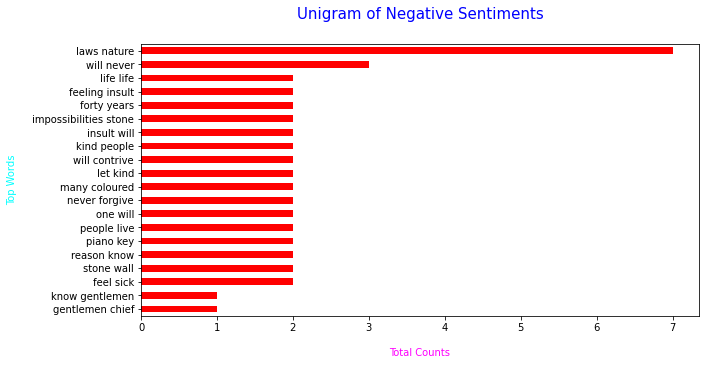

In [181]:
# Finding Unigram
words = Gram_Analysis(Negative["sentence"], 2, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

In [182]:
sentences_df['sentiment'].value_counts()

Positive    46
Negative    35
Neutral     25
Name: sentiment, dtype: int64

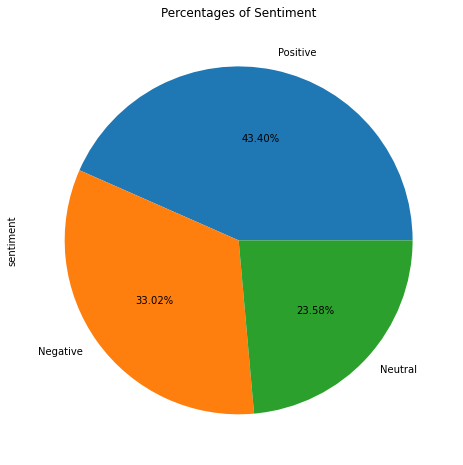

In [183]:
sentences_df.sentiment.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Sentiment", loc = "center")
plt.show()

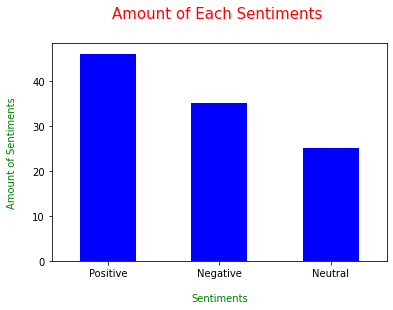

In [184]:
sentences_df["sentiment"].value_counts().plot(kind = "bar",color = "blue" )
plt.title("Amount of Each Sentiments ", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [185]:
from textblob import TextBlob

In [186]:
sentences_df["polarity"] = sentences_df["sentence"].map(lambda Text: TextBlob(Text).sentiment.polarity)

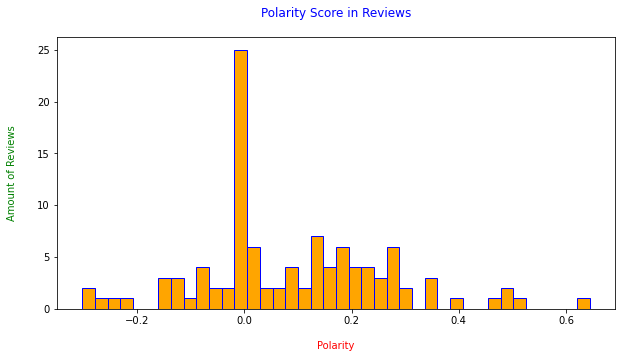

In [187]:
sentences_df["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

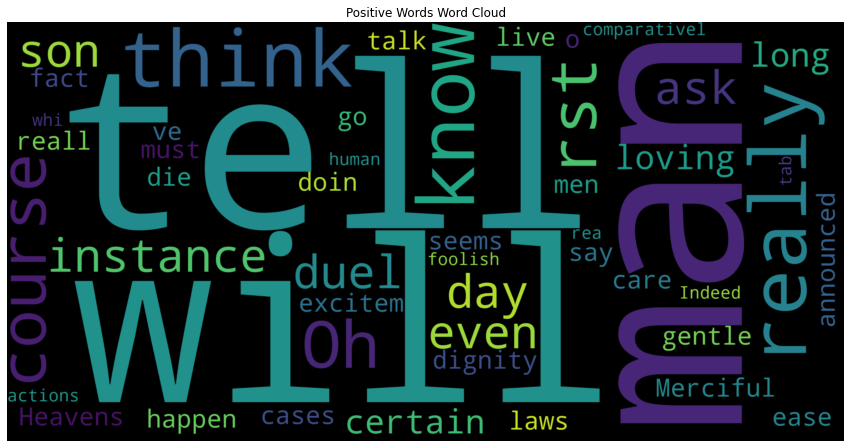

In [188]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = stopwords).generate(str(Positive["sentence"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.title('Positive Words Word Cloud')
plt.show()

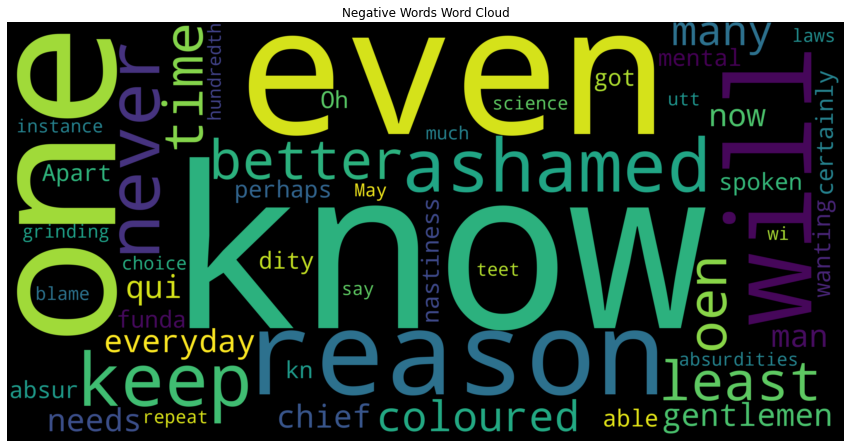

In [189]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = stopwords).generate(str(Negative["sentence"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.title('Negative Words Word Cloud')
plt.show()

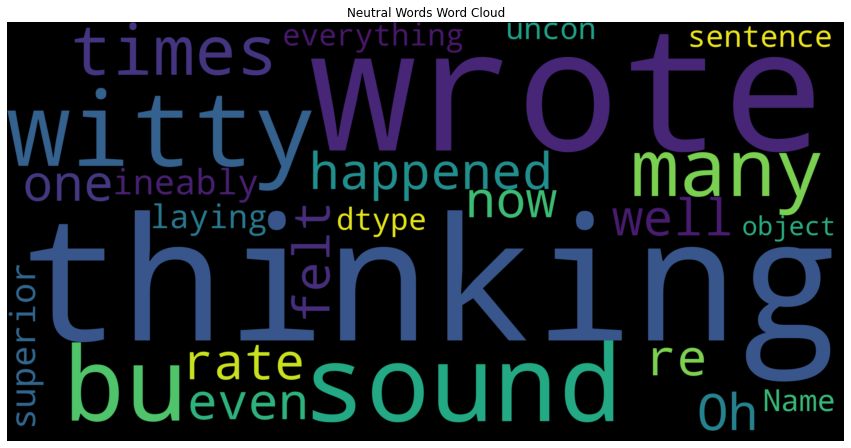

In [190]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = stopwords).generate(str(Neutral["sentence"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.title('Neutral Words Word Cloud')
plt.axis("off")
plt.show()

# SENTIMENT ANALYSIS

In [191]:
sentences_df.drop(labels=['sentiment_value','word_count','index','polarity'],axis=1,inplace=True)
sentences_df

sentence sentiment
0                                                    .   Neutral
1    wrote it thinking it would sound very witty bu...   Neutral
2    But do you know, gentlemen, what was the chief...  Negative
3                                            ... ... .   Neutral
4    For man everyday needs, it would have been qui...  Negative
..                                                 ...       ...
101                                                  .   Neutral
102                                                  .   Neutral
103                                                  .   Neutral
104                                                  .   Neutral
105  Why, to tell long sto ries, showing how have s...  Positive

[106 rows x 2 columns]

In [193]:
sentences_df.to_csv('emotions.csv')

### I. Pre-processing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoded the target column
le=LabelEncoder()
sentences_df['sentiment'] = le.fit_transform(sentences_df['sentiment'])

In [ ]:
sentences_df["sentiment"].value_counts()

### II. Model Building

In [92]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(sentences_df["sentence"])

# Check our matrix shape
X.shape

(106, 5000)

In [93]:
# Declaring our target variable
y = sentences_df["sentiment"]

### III. Normalizing

In [94]:
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
Counter(y)

Counter({1: 25, 0: 35, 2: 46})

In [97]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

### IV. Model Training

In [99]:
from sklearn.svm import SVC

In [100]:
clf= SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train,y_train)
clf.score(X_train, y_train)

1.0

### V. Model Testing

In [101]:
y_pred=clf.predict(X_test)

### VI. Model Evaluation

In [106]:
# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score

In [117]:
cm = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
Precision_Score= precision_score(y_test,y_pred,average ='weighted')
Recall_Score = recall_score(y_test,y_pred,average='macro')
Classification_Report = classification_report(y_test,y_pred)

In [119]:
print('Accuracy Socre       :',round(Accuracy_Score*100,4))
print('Precision Socre      :',round(Precision_Score*100,4))
print('Recall Socre         :',round(Recall_Score*100,4))
print('Confusion Matrix     :\n',cm)
print('Classification Report:\n',Classification_Report)

Accuracy Socre       : 82.8571
Precision Socre      : 85.8002
Recall Socre         : 80.5556
Confusion Matrix     :
 [[ 6  0  3]
 [ 1  9  2]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       1.00      0.75      0.86        12
           2       0.74      1.00      0.85        14

    accuracy                           0.83        35
   macro avg       0.86      0.81      0.82        35
weighted avg       0.86      0.83      0.83        35



### VII. Model Deployement

In [130]:
from pickle import dump

In [131]:
dump(clf,open('sentiment_analysis_model.pkl','wb'))

In [132]:
from pickle import load

In [133]:
loaded_pkl_file=load(open('sentiment_analysis_model.pkl','rb'))

In [134]:
predicted_score = loaded_pkl_file.predict(X_test)

In [135]:
accuracy_score(y_test,predicted_score)

0.8285714285714286

In [136]:
cm = confusion_matrix(y_test, predicted_score)
Accuracy_Score = accuracy_score(y_test, predicted_score)
Precision_Score= precision_score(y_test,predicted_score,average ='weighted')
Recall_Score = recall_score(y_test,predicted_score,average='macro')
Classification_Report = classification_report(y_test,predicted_score)

In [137]:
print('Accuracy Socre       :',round(Accuracy_Score*100,4))
print('Precision Socre      :',round(Precision_Score*100,4))
print('Recall Socre         :',round(Recall_Score*100,4))
print('Confusion Matrix     :\n',cm)
print('Classification Report:\n',Classification_Report)

Accuracy Socre       : 82.8571
Precision Socre      : 85.8002
Recall Socre         : 80.5556
Confusion Matrix     :
 [[ 6  0  3]
 [ 1  9  2]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       1.00      0.75      0.86        12
           2       0.74      1.00      0.85        14

    accuracy                           0.83        35
   macro avg       0.86      0.81      0.82        35
weighted avg       0.86      0.83      0.83        35



In [143]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [148]:
sentences = sentences_df.sentence.values
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(sentences)
padded_sequence = pad_sequences(encoded_docs, maxlen=1000)

In [149]:
sentiment_label = sentences_df.sentiment.factorize()
sentiment_label

(array([0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2,
        2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
        0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 0, 0,
        0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2,
        2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2], dtype=int64),
 Int64Index([1, 0, 2], dtype='int64'))

In [150]:
embedding_vector_length = 64
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=1000) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 64)          103040    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 1000, 64)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 169,141
Trainable params: 169,141
Non-trainable params: 0
________________________________________________

In [151]:
history = model.fit(x=padded_sequence,y=sentiment_label[0],validation_split=0.1, epochs=20, batch_size=64)

Epoch 1/20
2/2 [==============================] - 33s 19s/step - loss: 0.0000e+00 - accuracy: 0.2526 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 2/20
2/2 [==============================] - 22s 17s/step - loss: 0.0000e+00 - accuracy: 0.4526 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 3/20
2/2 [==============================] - 22s 17s/step - loss: 0.0000e+00 - accuracy: 0.4842 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 4/20
2/2 [==============================] - 24s 19s/step - loss: 0.0000e+00 - accuracy: 0.4842 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 5/20
2/2 [==============================] - 25s 20s/step - loss: 0.0000e+00 - accuracy: 0.4842 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 6/20
2/2 [==============================] - 24s 20s/step - loss: 0.0000e+00 - accuracy: 0.4842 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 7/20
2/2 [==============================] - 24s 19s/step - loss: 0.0000e+00 - accuracy: 0.4842 - val_loss: 0.000